# UBCO Data 301 Group 11 
## Milestone 2 Submission - Task 4 Group Data Analysis
## Wesley Burchnall, Andy McLean and Abirinder Brar


## Research Questions Introduction
Our groups motivation in researching is inherently self-interest. Abirinder, Andy and Wesley are all interested in purchasing properly in the near future. Ideally, we'd like to purchase during a time were prices are low, or have just dropped (crashed) and hold onto the property as value returns to normal to pay less in mortgage payments and see better return on our investment. Our group hopes to avoid purchasing immediately before a crash and losing substantial equity.

Throughout the past 40 years of Canadian real-estatae, the market has bubbled and crashed cyclicly several times. The first crashes was in Eastern Canada in the 1980s, followed by 1993 and then 2008. Data from the 1980s is less precise and reliable in terms of frequency of measurement and completeness so the scope of this analysis will be examining thteh 1993 and 2008 crashes. Our goal is to gather data to help us make smarter real estate investments through the following sets of questions.

## Research Questions for Our Group
1. Is now a good time to purchase real estate in Kelowna? 
     - Is a Real Estate crash imminent?
     - How long does recovery from a crash take/how many years will we have to make a purchase before prices rebound?
2. Will different types of real estate be effected differently by a market crash? 
     - Does a house devaluate more than an apartment or townhouse?
     - Do different areas depreciate fairly linearly across BC and Canada when a market crash occurs?
3. Individual slants on research (personal interest - motivation)
     - What will happen in Vancouver? (Wesley - bound by threat of girlfriend's ire, we cannot leave BC but she is willing to consider relocating within)
     - What will happen in Kelowna? (Abirinder -- is well setup in Kelowna with wife, kids and employment. Not seeking to move)
     - What will happen Canada-wide? (Andy -- most willing to relocate as no current relationship or kids/wife)

### Importing the package that contains our project functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import sys
sys.path.append('..')
from scripts import project_fuctions as pf

### Loading the data

In [2]:
### Loading the DataFrames for EDA
masterDF = pf.load_and_process()
MLS_BC_HPI_DF = pf.loadMLSRegionalHPIData()

## RQ1a - Exploring the data through a custom-made describe function that features breakdown by decade

### An Introduction

The variables I have choosen to explore in my EDA are new house prices, prime interest rate for mortgages and total savings as a % of GDP; each with its own reasoning why these may be good indicators of future crashes. First, seeing the change in house prices before previous crashes in 93 and 2008, and shape/time the subsequent recovery took, may provide some indicator of what housing price fluxation leading up to a crash will look like. Secondly, low prime interest rates for mortgages effect the cost of borrowing and allow customers to spend-more-money with a lower monthly payment.  Third, most mortgages require a downpayment. This is usually reflective in Canadians creating a store of money in savings which is then used as a down payment. A lack of Canadian savings, might necessitate difficulty getting mortgage approval and be related to a market-crash.

#### Examining Prime Rate - How does Historical Prime Rate compare to today?
#### Graphical Examination

Figure 1 and 2: A graph of changes in Prime Interest rate for mortgages over time as bar and scatter plots. A general trend of decreasing interest rates from the 80s to 00s. Around 00s, the decrease stalls and interest rates remain fairly flat. There are noteable spikes in interesting rates that break from the general trend downards. The first is around 1989-1991 just prior to the 1993 crash. The second is three years of interest rate rises from 2005 to 2007 prior to the 2008 crash. Interest rates may be beginning to rise in 2018 onwards. 

Possible explanation for this behavior is interest rates effect buying habits. When interest rates increase, the cost of mortgage payments at current housing prices will also correspondingly increase. This would result in less ability to finance expensive homes and could result in a downward swing in housing prices. 

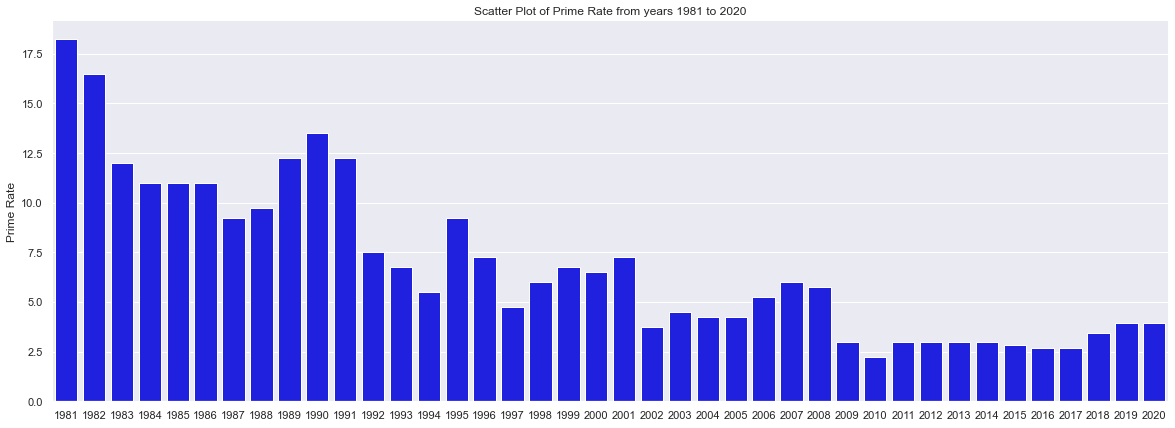

In [19]:
pf.barPlotOverTime(masterDF,'Prime Rate',41,25,12,'blue')

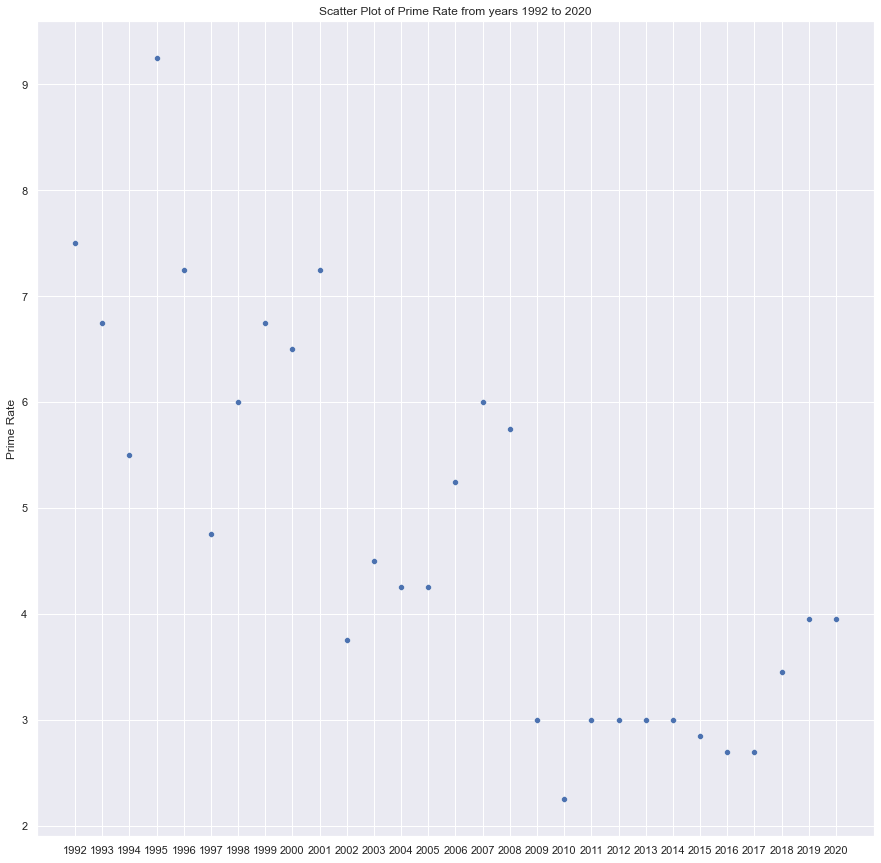

In [4]:
pf.scatterPlotOverTime(masterDF,'Prime Rate',30,15,15)

#### Statistical Examination

In [5]:
pf.printStatTableByDecade(masterDF,'Prime Rate')

A Summary of Stats Prime Rate By Decades in Tabular Form
--------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 12.333	 | 9.25	 | 18.25 |
90s    | 7.95	 | 4.75	 | 13.5 |
00s    | 5.05	 | 3.0	 | 7.25 |
10s    | 2.99	 | 2.25	 | 3.95 |
20s    | 3.2	 | 2.45	 | 3.95 |


Observation: Downward trends from 80s to 10s in Min, Max and Mean Prime Rate of Interest for Mortgages. This confirms trend shown in Figure 1 and 2 in aggregate. Additionally, in 2020s, we can see the max and min did not decrease, and the mean actually increased.

#### Examining BC New Housing Price Index - How does Historical Housing Prices compare to today?
#### Graphical Examination

Figure 3: A graph of BC New House prices over time. We can see the 2008 housing crash reflected in the prices of new houses in BC. There is a sharp increase, leading up to 2008, followed by a period of gradual decrease until 2015. The recovery period was approximately 7 years. The 1993 crash in about 8 years until 2001 to see an increase in prices. We also see a very sharp increase from 2015 to 2018 that mirrors 2003 to 2008's continual increase. We also see a leveling in 2019 and even a small drop in 2020. If that is the start of another crash, we can expect no new growth or decreases for approximately 7-8 years.

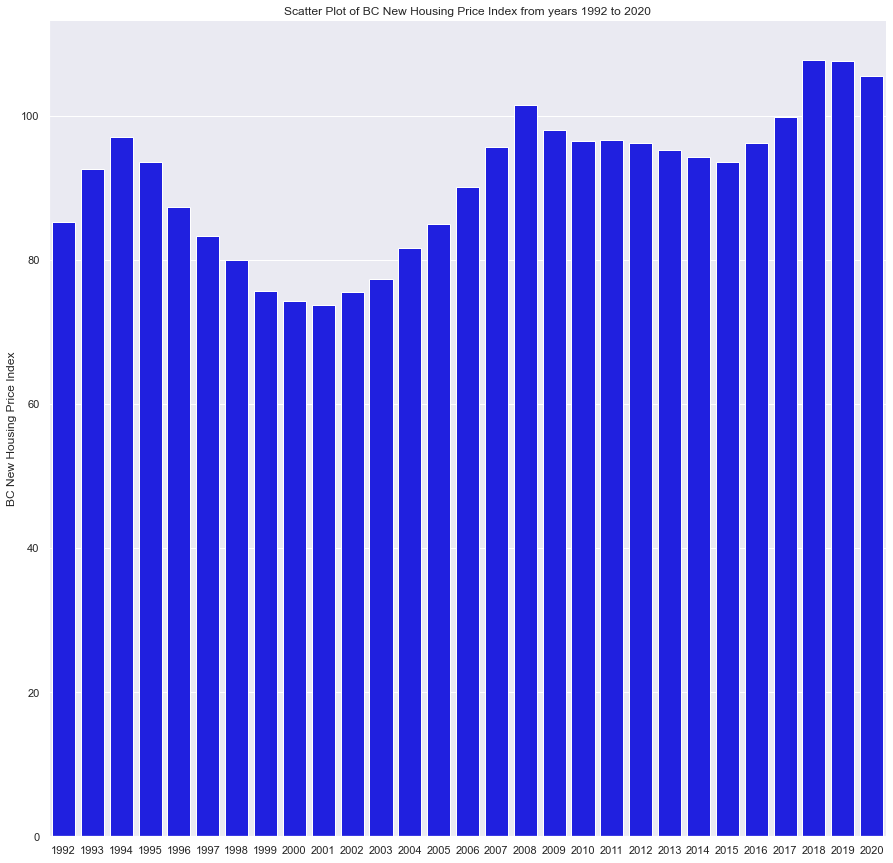

In [6]:
pf.barPlotOverTime(masterDF,'BC New Housing Price Index',30,15,15,'blue')

#### Statistical Examination

In [7]:
pf.printStatTableByDecade(masterDF,'BC New Housing Price Index')

A Summary of Stats BC New Housing Price Index By Decades in Tabular Form
------------------------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 70.3	 | 66.3	 | 76.9 |
90s    | 86.99	 | 75.7	 | 97.1 |
00s    | 85.31	 | 73.7	 | 101.5 |
10s    | 98.42	 | 93.6	 | 107.8 |
20s    | 108.9	 | 105.5	 | 112.3 |


Examining the data table above, we can see that mean, minimum and maximum housing prices rose from the 80s to 90, 00s to 10s and 10s to 2020s. We did however see a stall in the decade of 90s to 00s. As market crashes occured in '93 and 2008 respectively. The decreate in 00s housing prices compared to 90s, is reflective of the slump we say in Figure 3.

#### Examining Gross Savings - How does Gross Savings as a % of GDP change over time?
#### Graphical Examination

Figure 4: A graph of changes in Canadian Savings as a Percentage of GDP. Observations include a large-drop occurs in average canadian in 1991 and subsequent drop in 1992, just prior to the 1993 crash.  Prior to the 2008 crash, we do not see a sharp drop but zero-growth (or slightly negative growth) occurs. From 2015 to 2020, we see no growth and a slight decrease in 2020.

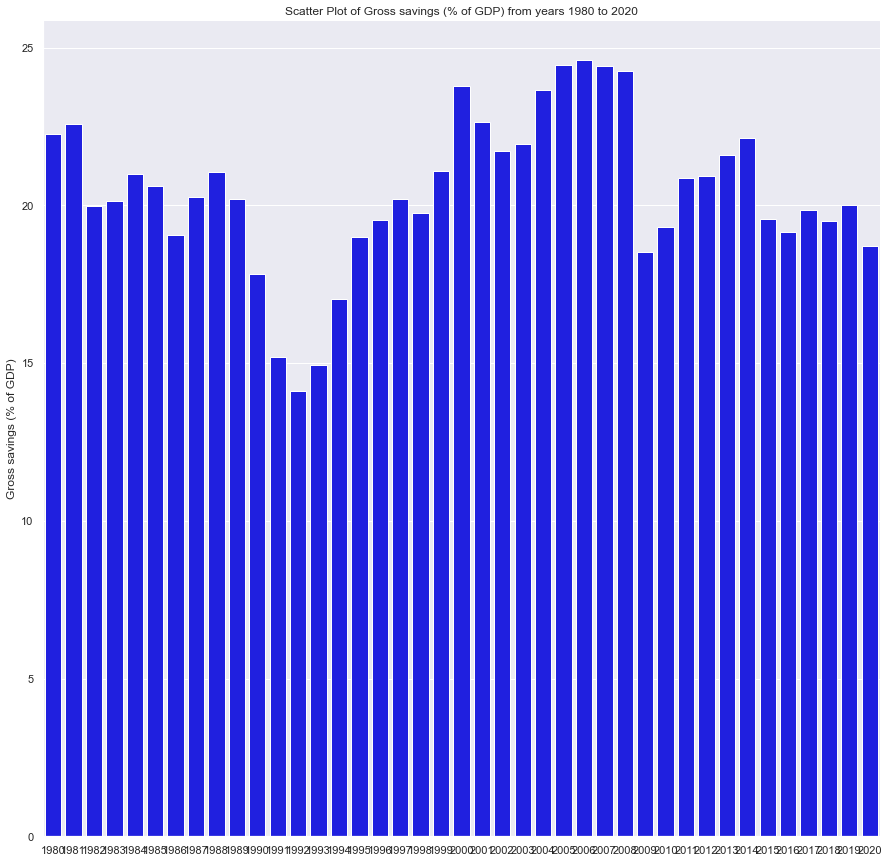

In [8]:
pf.barPlotOverTime(masterDF,'Gross savings (% of GDP)',42,20,7,'blue')

#### Statistical Examination

In [9]:
pf.printStatTableByDecade(masterDF,'Gross savings (% of GDP)')

A Summary of Stats Gross savings (% of GDP) By Decades in Tabular Form
----------------------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 20.71	 | 19.046	 | 22.568 |
90s    | 17.87	 | 14.104	 | 21.096 |
00s    | 22.998	 | 18.52	 | 24.617 |
10s    | 20.291	 | 19.146	 | 22.148 |
20s    | 18.719	 | 18.719	 | 18.719 |


Examining the data table above, observe the lowest mean savings were in the 90s and 20s. Additionally, the two lowest periods of savings, were decades which coincide with real estate crashes; the 90s and 00s.  The third lowest is current-decade. If low-savings, hinders purchasers from taking out mortgages and may indicate a looming crash, savings are as bad now as they were in 2008.

### Conclusion of Exploratory Data Analysis

All three variables examined in the EDA, new house prices, prime interest rate for mortgages and total savings as a % of GDP, each experienced changes leading up to 1993 and 2008 real estate crashes. Houses prices say a rise for a few years leading up to the crash and the crash remained for on average a 7 year period before the market returned to it's former level. As a result, the prime time to buy would be within seven years of a crash. Additionally, the 2018 to 2020 indicators mimmick similar pattersn seen in the 1993 and 2008 bubble. RQ1b models and predicts using Multiple Linear Regression what effect on Housing Price Index might be if these trends continue. 

## RQ1b - Exploring a Multiple Linear Regression of the effect of Prime Interest Rate and Total Savings of Canadians as Percentage of GDP on BC New Housing Prices 

### Examining the effects of prime interest rate increases to 4% and 6% by 0.5% step size and total savings decreases from 18% to 14% by 1% step size.

### An Introduction

A Multiple Linear Regression allows us to attempt to associate the variables to a given output. In this linear regression, the choosen input variable is the prime rate and savings as a percentage of GDP and the output we are associating with is the BC New Housing Price Index.

#### Multiple Linear Regression Analysis (MLRA)

In [10]:
X = pf.limitYears(masterDF,35).transpose()[['Prime Rate', 'Gross savings (% of GDP)']]
Y = pf.limitYears(masterDF,35).transpose()['BC New Housing Price Index']

ourMultipleLinearRegressionModel = linear_model.LinearRegression()
ourMultipleLinearRegressionModel.fit(X, Y)

print('Linear Intercept: \n', ourMultipleLinearRegressionModel.intercept_)
print('Linear Coefficients: \n', ourMultipleLinearRegressionModel.coef_)

print('\nA negative coefficient indicates increase the associated variable decreases the cost of new housing in BC.')
print('A positive coefficient indicates increase the associated variable increases the cost of new housing in BC.\n')

predictionPrimeRates = [4.00,4.50,5.00,5.50,6.00]
predictionGrossSavingPercentages = [18.00,17.00,16.00,15.00,14.00]

print("Prime Rate | Savings as % of GDP | Predicted BC New Housing Price Index")

for rate in predictionPrimeRates:
    for percentage in predictionGrossSavingPercentages:
        print (str(rate) + "        | " + str(percentage) + "                | ", str(round(ourMultipleLinearRegressionModel.predict([[rate , percentage]])[0],4)))




Linear Intercept: 
 128.80686347462242
Linear Coefficients: 
 [-2.08881392 -1.36497326]

A negative coefficient indicates increase the associated variable decreases the cost of new housing in BC.
A positive coefficient indicates increase the associated variable increases the cost of new housing in BC.

Prime Rate | Savings as % of GDP | Predicted BC New Housing Price Index
4.0        | 18.0                |  95.8821
4.0        | 17.0                |  97.2471
4.0        | 16.0                |  98.612
4.0        | 15.0                |  99.977
4.0        | 14.0                |  101.342
4.5        | 18.0                |  94.8377
4.5        | 17.0                |  96.2027
4.5        | 16.0                |  97.5676
4.5        | 15.0                |  98.9326
4.5        | 14.0                |  100.2976
5.0        | 18.0                |  93.7933
5.0        | 17.0                |  95.1582
5.0        | 16.0                |  96.5232
5.0        | 15.0                |  97.8882
5.0      

C:\Users\Wesley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


### Conclusion
From examining the output table, the model predicts further increases in interest rate (continuing the trend in 2018-2020), will result in a reduction in housing price index value. The greater the increase in interest, the greater the expected reduction. Similarly, if the average Canadians saving as a percentage of GDP decreases, the model predicts a reducing in housing price index value. As a guide to interpreting this data, 4.5% prime interest rate for mortgages with an average savings of 14% of GDP results in "100 HPI" and since the baseline was set in 2012 for this dataset, it would imply housing prices would fall to Dec 2016 prices when the 100 HPI was set. Whereas 6% prime interest rate and 14% GDP results in "97 HPI" which was last seen in ~1993.

Thus, if trends in the RQ1a prove true, RQ2b's analysis and model predicts falling housing prices over the coming years.

## RQ2a - Will different types of real estate be effected differently by a market crash?


### Introduction

Traditionally, some dwelling types are known for only experiencing depreciation such as trailers in mobile home parks. In fact, most banks will not provide mortgages for such homes it is nearly impossible to get back the principle in cases of mortgage default. As a result, curiosity arose as to whether most housing-types are affected in a similar pattern by market crashes or if one type of dwelling with depreciate substantially more. As this might effect our buying-habits and choices. To test this hypnothesis, we used the MLS HPI data to plot in Kelowna, the change seen four dwelling types.


### Graphical Examination

Figure 5: A graph of dwelling types in Kelowna's prices with respect to time. Obserable is leading up to the 2008 crash and following the crash, housing prices both rose aand feel linearly, regardless of dwelling type. It appears, dwelling types not have an effect of how a market crash will effect housing prices. Thus, it might be an equally poor time to buy regardless type of homeownership one seeks. Note: Axes are removed to emphasis shape/percentage change of trend for relative-comparison.

range(0, 4)


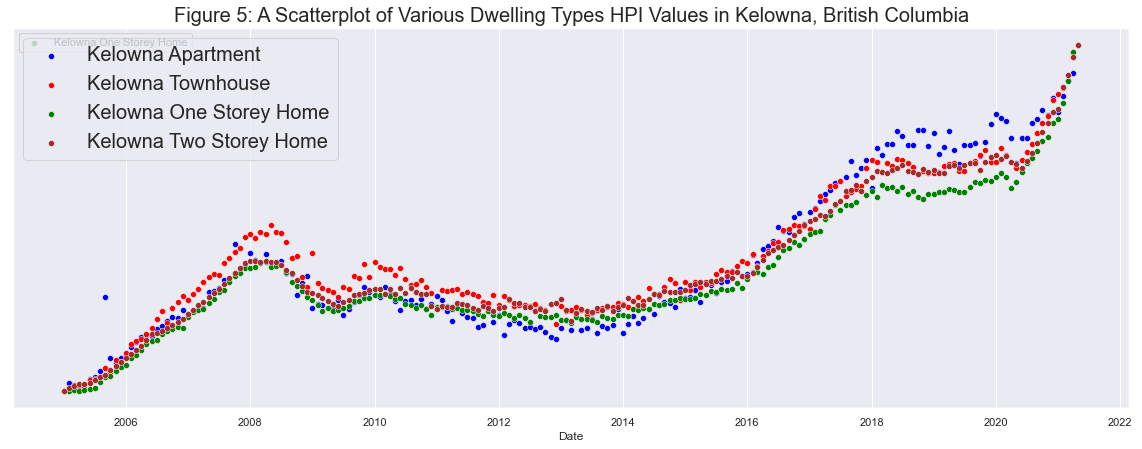

In [11]:
pf.multiScatterPlot(MLS_BC_HPI_DF,['Kelowna Apartment','Kelowna Townhouse', 'Kelowna One Storey Home','Kelowna Two Storey Home'], ['blue','red','green','brown'],'Figure 5: A Scatterplot of Various Dwelling Types HPI Values in Kelowna, British Columbia')

### Conclusion
Market crash results and lead-up prior on housing price index is not effected by dwelling type.

## RQ2b - Do different areas depreciate uniformly across BC and Canada when a market crash occurs?

### Introduction

This analysis seeks whether location has an effect on how a real estate market crash effects depreciation. This is relatively important to us as potential buyers whom are interested in purchasing properties in different locales. Buying decisions may be effected by how much profit can be gained buying post crash in various locations.

### Graphical Examination

Figure 6-9: Graaphs of same-dwelling types in Kelowna, Vancouver and Across Canada in Aggregate. Observations can be seen that Kelowna HPI had an exaggerated price increase leading up to the 2008 crash compared to the Vancouver and Canadian Aggregate HPIs. However, in recent years in 2014-2018, Vancouver's growth leading up to what may be the next crash, appears to be outpacing Kelowna and the Canada Aggregate HPI.

range(0, 3)


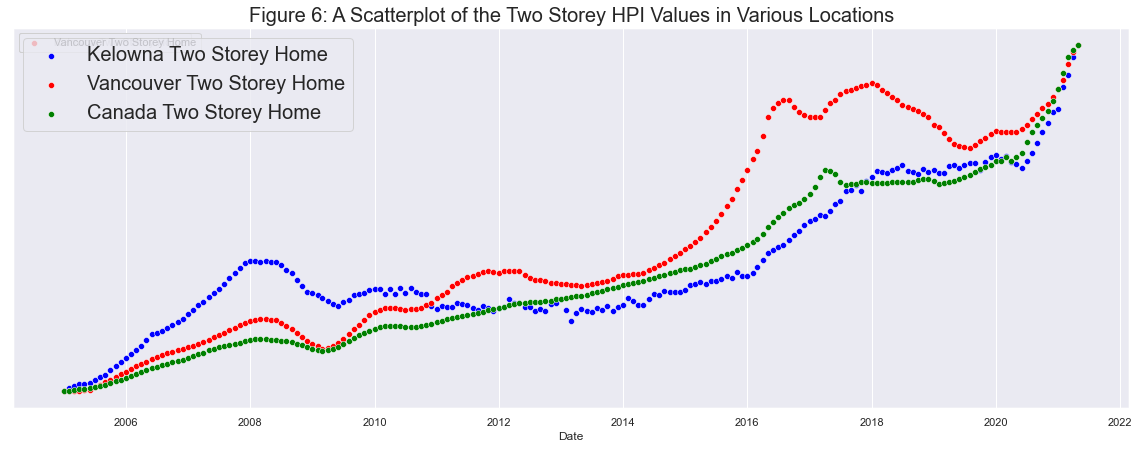

In [12]:
pf.multiScatterPlot(MLS_BC_HPI_DF,[ 'Kelowna Two Storey Home', 'Vancouver Two Storey Home', 'Canada Two Storey Home'], ['blue','red','green'],'Figure 6: A Scatterplot of the Two Storey HPI Values in Various Locations')

range(0, 3)


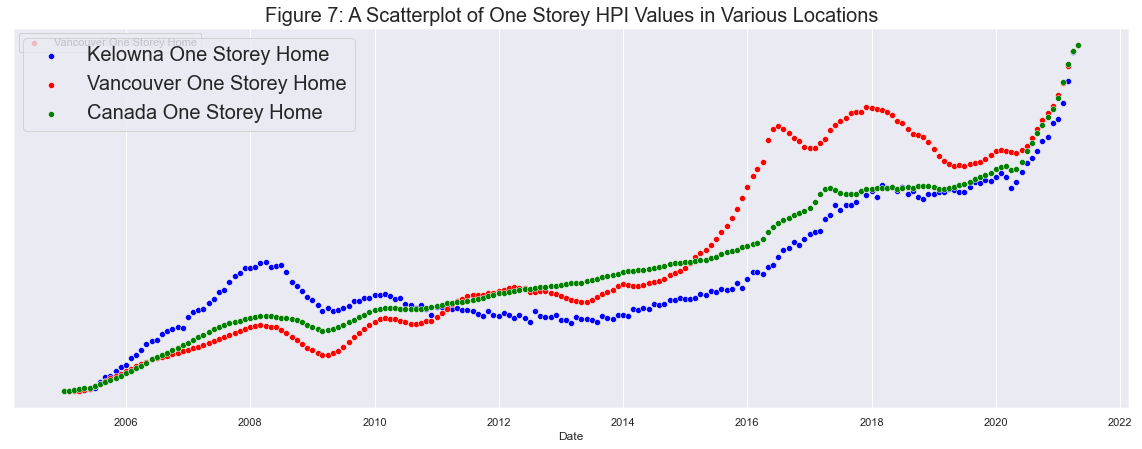

In [13]:
pf.multiScatterPlot(MLS_BC_HPI_DF,[ 'Kelowna One Storey Home', 'Vancouver One Storey Home', 'Canada One Storey Home'], ['blue','red','green'],'Figure 7: A Scatterplot of One Storey HPI Values in Various Locations')

range(0, 3)


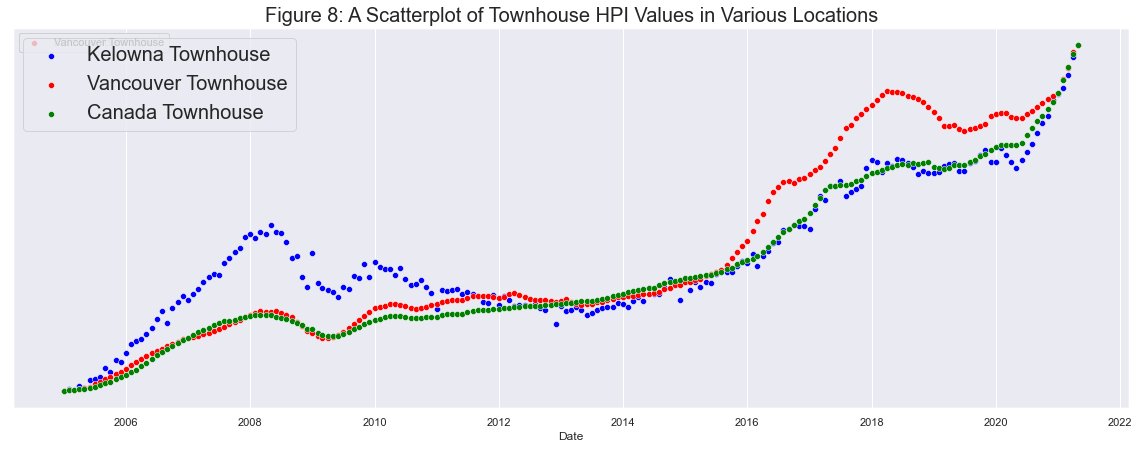

In [14]:
pf.multiScatterPlot(MLS_BC_HPI_DF,[ 'Kelowna Townhouse', 'Vancouver Townhouse', 'Canada Townhouse'], ['blue','red','green'],'Figure 8: A Scatterplot of Townhouse HPI Values in Various Locations')

range(0, 3)


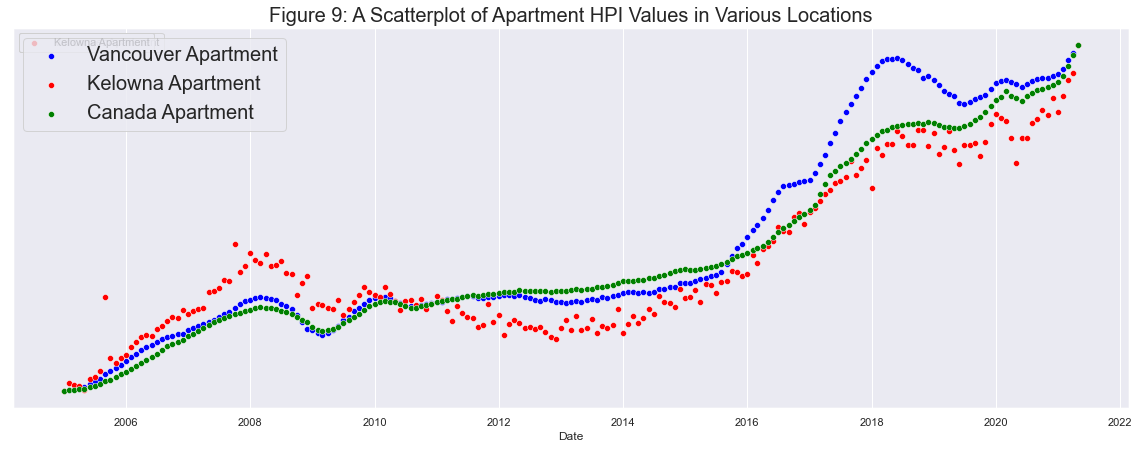

In [15]:
pf.multiScatterPlot(MLS_BC_HPI_DF,['Vancouver Apartment', 'Kelowna Apartment', 'Canada Apartment'], ['blue','red','green'],'Figure 9: A Scatterplot of Apartment HPI Values in Various Locations')

### Conclusion
From the figures 6-9, it is obsverable that different locations responded to the market crash to a different severity though the a general pattern/trend remains constant across the various locations. For example, leading up to 2008, Kelowna had a slightly greater spike prior to the 2008 crash and subsequent decline. Where in 2016 to 2020, Vancouver seems to take the lead as far as rapid-inflation of housing prices so hey may be more effected by the next market crash. Thus, it is less adviseable to buy in Vancouver and more adviseable to buy in Kelowna to avoid as much equity loss if one were to purchase today. If one were to purchase post crash, Vancouver will likely see the largest drop in housing prices.

## RQ3A (Wesley)

From our research above, we can see that within Vancouver, there a uniform pattern shape in the increase of cost of housing and high correlation between areas. However, having a higher base cost, an equal percentage represents a higher dollar increase. For example, two-storey houses increased by nearly $425k from mid 2019 to 2021 or ~25% while apartments raised in cost by only $100,000. As a result, is likely more risky to invest in real estate in Vancouver at this time compared to other locations and especially two storey houses. Renting and saving additional money, waiting for the crash to occur and then purchasing would likely be a better strategy to avoid equity loss. Furthermore, Figure 10 illustrates that apartments have seen the largest increase in recent years and may be most prone to severe crashes.  One storey homes has seen the greatest rapid increase and likely would have the highest risk of investment. Apartment represent the lowest risk.

Figure 10: Vancouver real estate properties by dwelling type.

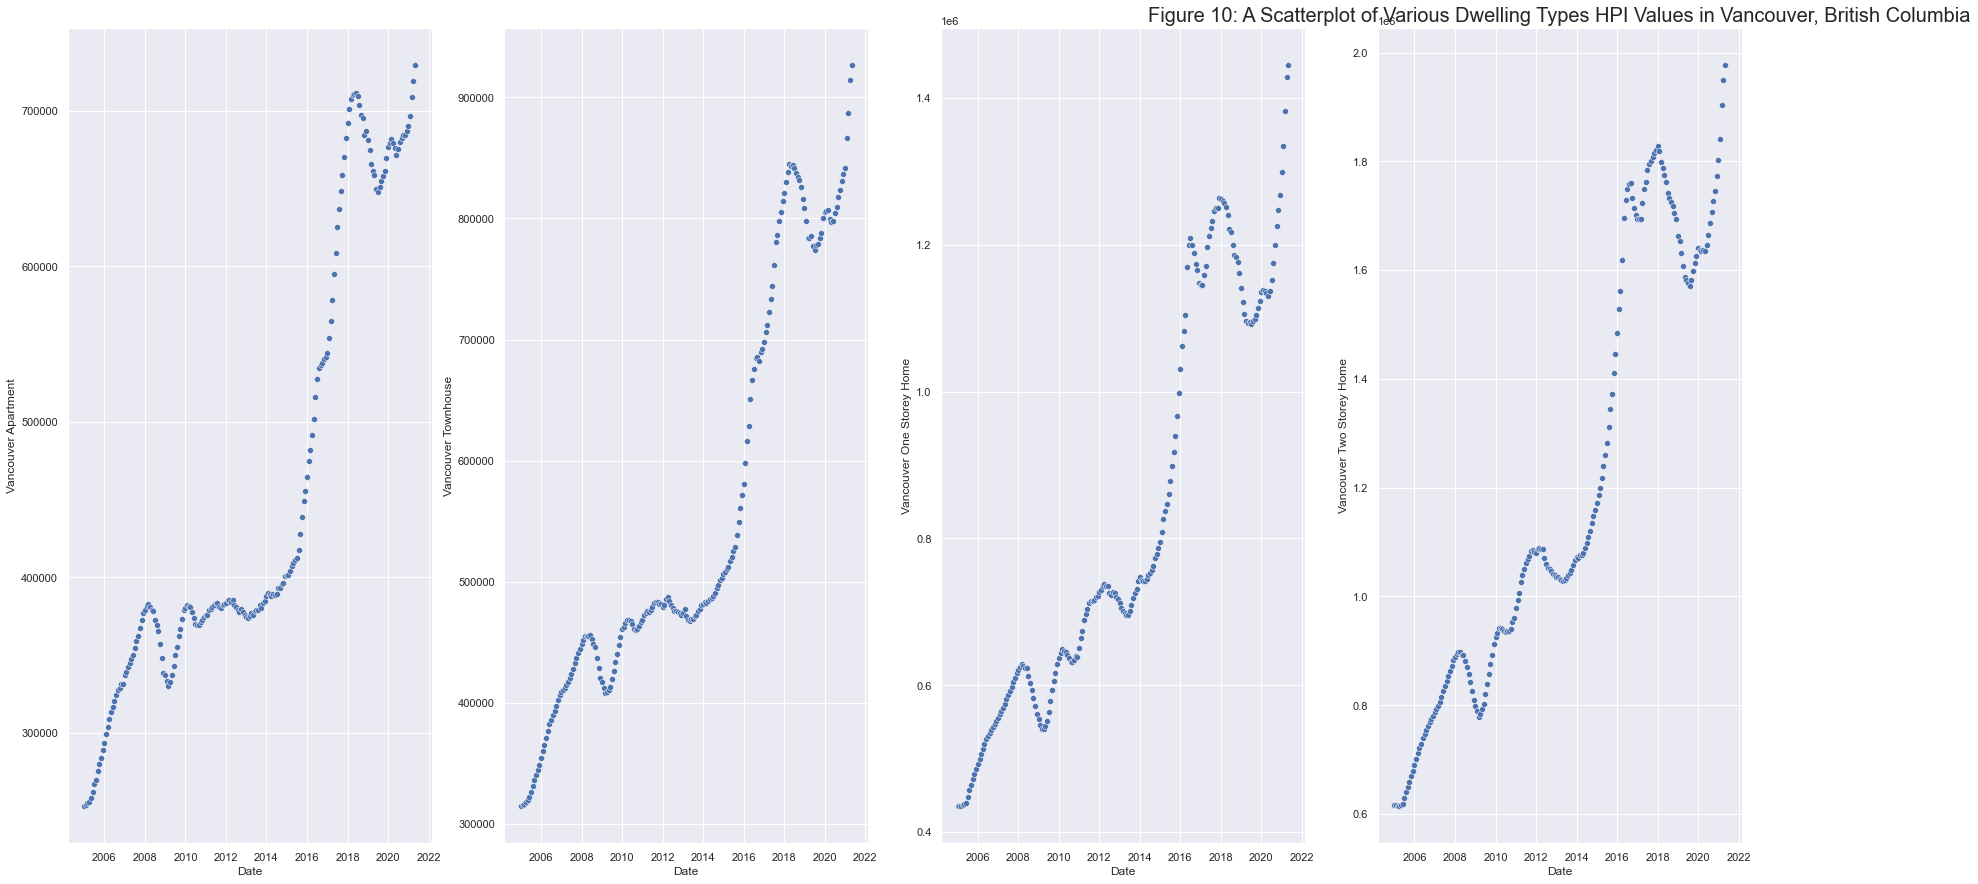

In [16]:
pf.sideBySideScatterPlot(MLS_BC_HPI_DF,['Vancouver Apartment','Vancouver Townhouse', 'Vancouver One Storey Home', 'Vancouver Two Storey Home'], 'Figure 10: A Scatterplot of Various Dwelling Types HPI Values in Vancouver, British Columbia')

## RQ3B (Abirinder)

## What will happen in Kelowna? (Abirinder -- is well setup in Kelowna with wife, kids and employment. Not seeking to move)

Based on the available data, it appears that the time to have purchased might be lost and it would be best to watch for a dip in the market. THe likelyhood for a true crash is unlikely simply because of the historic trend of Canadian real estate (particularly British Columbia) weathering the storm of worldwide recession better than other countries. An interesting comparison in the future would be to the values of homes in the interior and coastal regions of BC to those in comparable communities in the US to see how well pricing has held up. Truth be told the only homes that would be particularly relevant would be One and Two store homes in Kelowna and at this point living one hour away in Summerland where we already own a home and are close enough to ameneties would be the best course of action.  

range(0, 4)


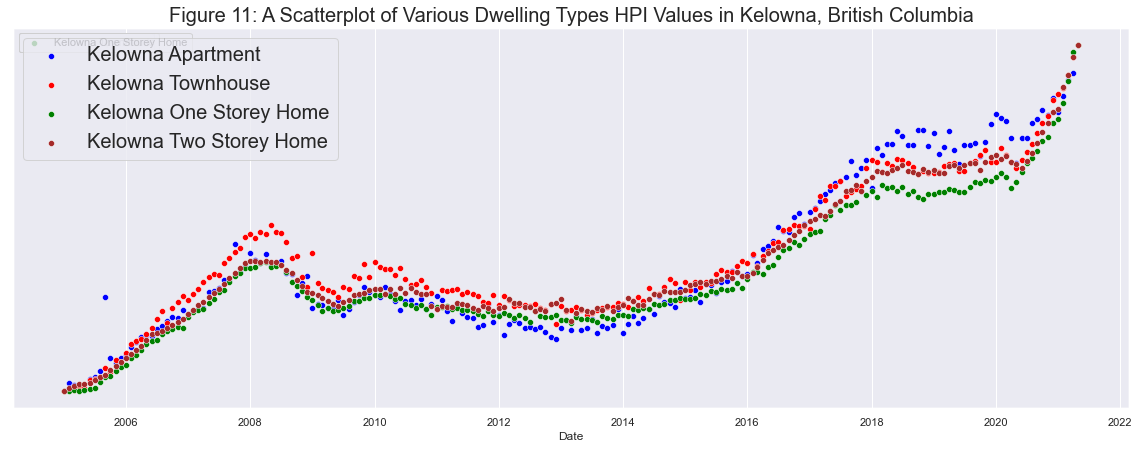

In [17]:
pf.multiScatterPlot(MLS_BC_HPI_DF,['Kelowna Apartment','Kelowna Townhouse', 'Kelowna One Storey Home','Kelowna Two Storey Home'], ['blue','red','green','brown'],'Figure 11: A Scatterplot of Various Dwelling Types HPI Values in Kelowna, British Columbia')

## RQ3C (Andy)

## What will happen Canada-wide? (Andy -- most willing to relocate as no current relationship or kids/wife)
From the research we can conclude that everything is spiking from 2019 onwards to the current date. It appears apartments from 2017 on had the greatest rise in HPI index, up unitl 2021, where all others overtook and seem to have a near exponential rise as shown in the graph. Renting may seem the better choice as to save money until the time where one of the other options levels/decreases. From the dataset and the graphed values, one can see that in 2007 a Canada two storey home would the better of the choices but as we move to 2021 we can see that it now has the highest change in the HPI index, possibly making it a riskier choice. No matter what, we can see that they all have increased greatly according to the data wrangled in this project.


range(0, 4)


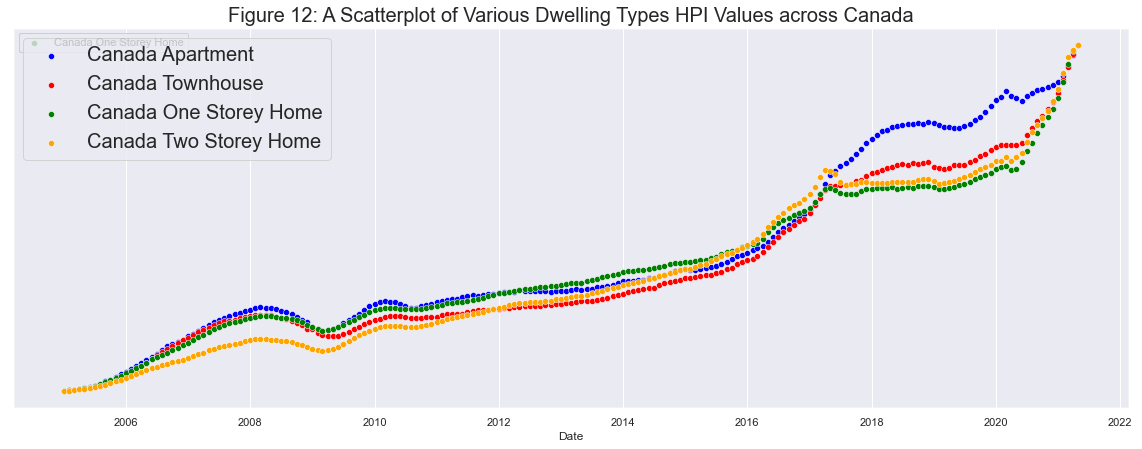

In [18]:
pf.multiScatterPlot(MLS_BC_HPI_DF,['Canada Apartment','Canada Townhouse', 'Canada One Storey Home','Canada Two Storey Home'], ['blue','red','green','orange'],'Figure 12: A Scatterplot of Various Dwelling Types HPI Values across Canada')